In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from mlresearch.utils import set_matplotlib_style
from recgame.recourse import NFeatureRecourse
from recgame.populations import BasePopulation
from recgame.environments import BankLoanApplication2
from recgame.utils import generate_synthetic_data

In [2]:
set_matplotlib_style(16)

# Some variables to define the problem
RNG_SEED = 42
N_CONTINUOUS = 2
N_CAT = 0
N_AGENTS = 100

# Environment variables
N_LOANS = 10  # np.array([20, 1, 10, 30, 0, 5, 50, 10, 40])
ADAPTATION = 15  # np.array([.2, .1, .3, .25, .1, .4, .05, .05, .2])
NEW_AGENTS = 10  # np.array([40, 10, 50, 5, 0, 100, 0, 0, 20])

df, y, categorical = generate_synthetic_data(N_AGENTS, N_CONTINUOUS, N_CAT, RNG_SEED)

lr = LogisticRegression().fit(df, y)

In [3]:
# Define the necessary components to run simulation
population = BasePopulation(df, categorical=categorical)
recourse = NFeatureRecourse(lr, n_features=2)
environment = BankLoanApplication2(
    population,
    recourse,
    n_loans=N_LOANS,
    adaptation=ADAPTATION,
    new_agents=NEW_AGENTS,
    random_state=RNG_SEED,
)

environment.run_simulation(20)

<Axes: title={'center': 'Population scores over 21 time steps'}, xlabel='Step', ylabel='Score'>

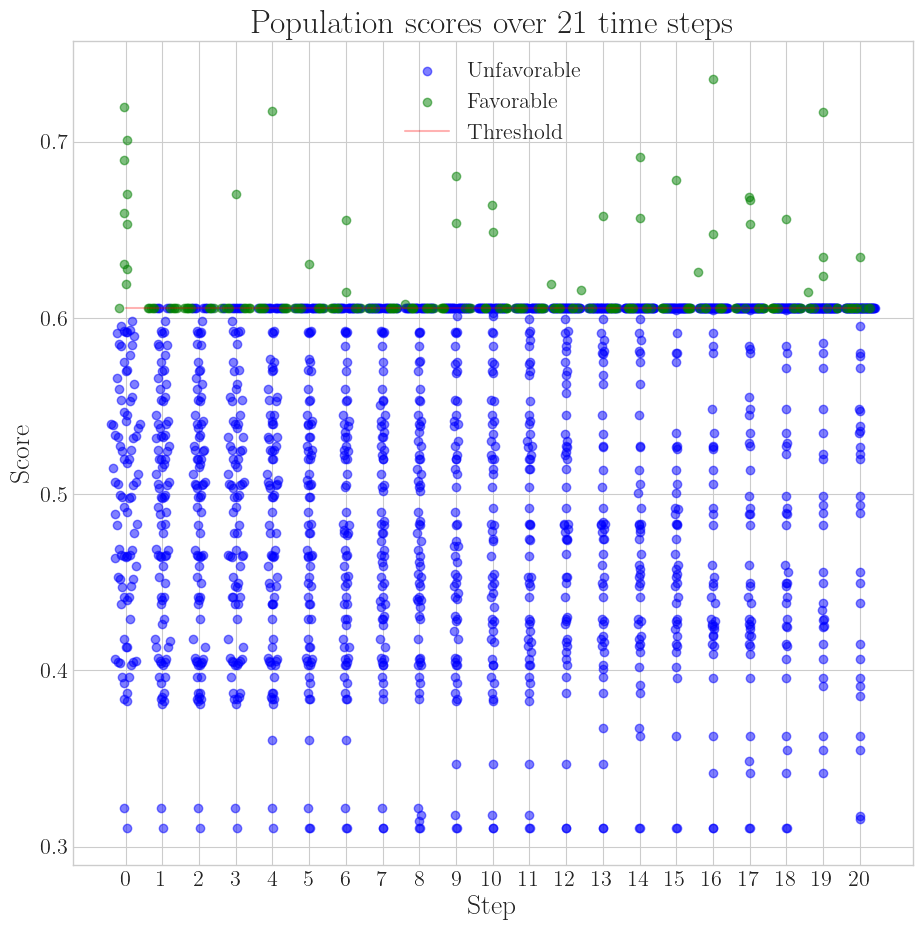

In [4]:
environment.plot.agent_scores()

<Axes: title={'center': 'Population at t=1'}, xlabel='f_0', ylabel='f_1'>

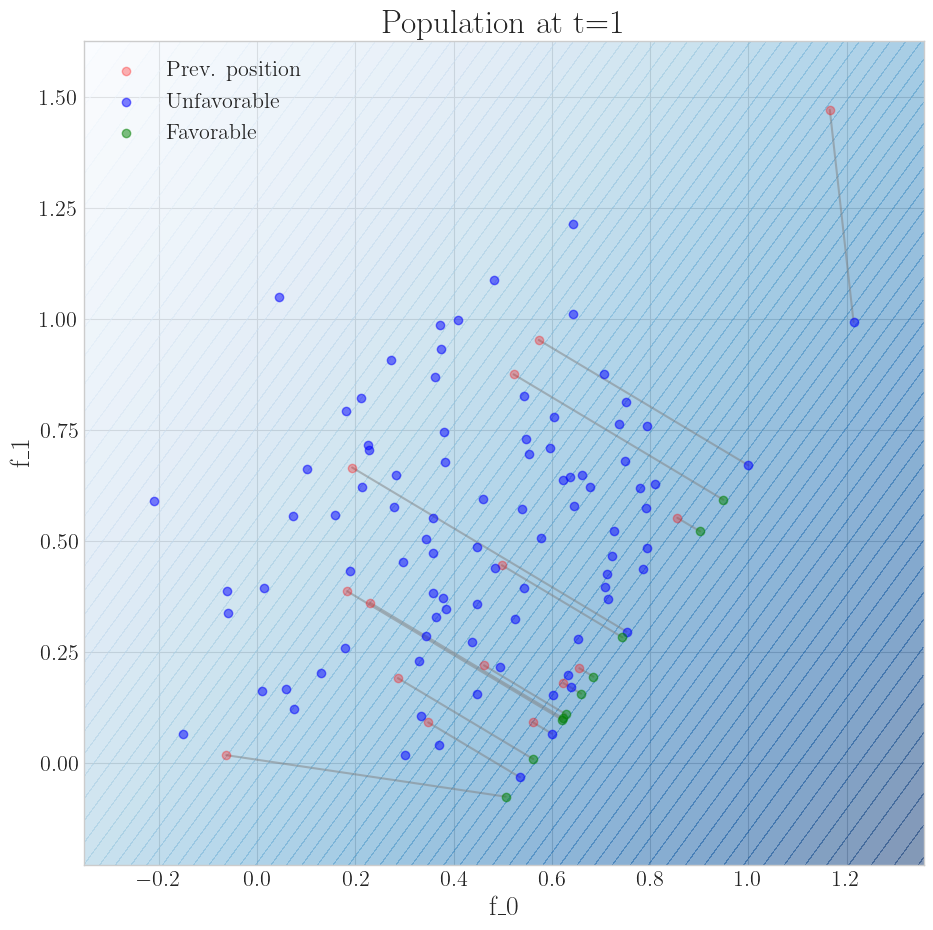

In [5]:
environment.plot.scatter(1)

(array([ 2.,  3., 13., 18., 16., 20., 17.,  5.,  3.,  3.]),
 array([0.31059223, 0.35146955, 0.39234686, 0.43322417, 0.47410149,
        0.5149788 , 0.55585612, 0.59673343, 0.63761074, 0.67848806,
        0.71936537]),
 <BarContainer object of 10 artists>)

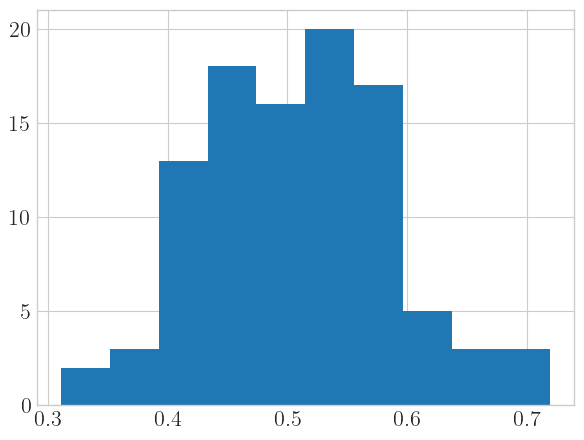

In [6]:
environment.plot.scores_histogram(0)

<Axes: ylabel='Density'>

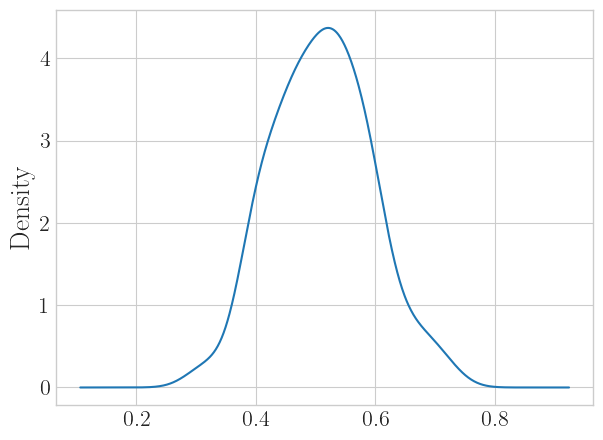

In [7]:
environment.plot.scores_kde(0)
# environment.plot.scores_kde(100)

<Axes: title={'center': 'Population size over 21 time steps'}, xlabel='Step', ylabel='Number of agents'>

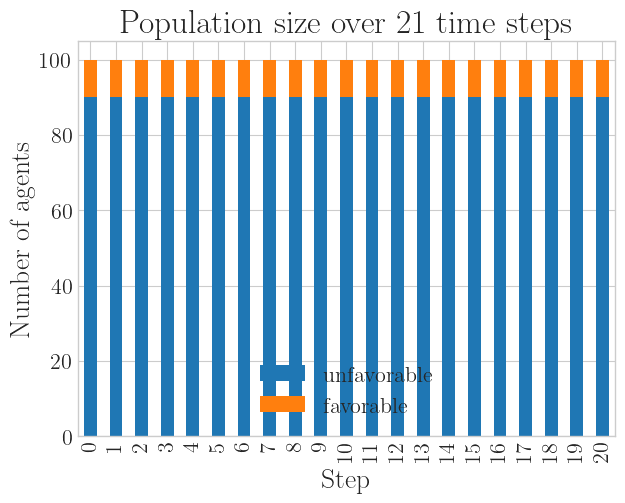

In [8]:
environment.plot.population_size()

In [9]:
environment.success_rate(1, 20)

array([0.90909091, 0.9       , 0.8       , 0.81818182, 0.66666667,
       0.66666667, 0.46153846, 0.5       , 0.36363636, 0.1       ,
       0.22222222, 0.33333333, 0.3       , 0.33333333, 0.14285714,
       0.28571429, 0.1       , 0.30769231, 0.25      ])

In [10]:
environment.threshold_drift(1, 20)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [11]:
environment.agents_info()

,entered_step,n_adaptations,favorable_step,original_score,final_score,n_failures
0,0,1,11.0,0.592102,0.605722,0
1,0,2,6.0,0.519861,0.605722,0
2,0,1,16.0,0.417626,0.605722,1
3,0,1,20.0,0.537543,0.605722,1
4,0,1,NaN,0.555235,NaN,1
...,...,...,...,...,...,...
295,20,0,NaN,0.578593,NaN,0
296,20,0,NaN,0.535949,NaN,0
297,20,0,20.0,0.634516,0.634516,0
298,20,0,NaN,0.547182,NaN,0


In [12]:
environment.metadata_[0]["threshold"]

0.6057224163373562

In [13]:
# probability of an agent to be above the threshold
p = environment.new_agent_proba(environment.metadata_[10]["threshold"])

# number of observations to generate to have 10 observations above threshold
n = 100 / p
n

1000.0

In [14]:
environment.steps_info()

,n_adapted,n_candidates,favorable_outcomes,success_rate,threshold,threshold_drift,new_agents,new_agents_proba,moving_agent_proba,success_proba
1,15.0,11.0,10.0,0.909091,0.605722,0.0,10.0,0.1,0.168539,0.056999
2,15.0,10.0,10.0,0.900000,0.605722,0.0,10.0,0.1,0.168539,0.054423
3,15.0,10.0,10.0,0.800000,0.605722,0.0,10.0,0.1,0.170455,0.051756
4,15.0,11.0,10.0,0.818182,0.605722,0.0,10.0,0.1,0.174419,0.048998
5,15.0,12.0,10.0,0.666667,0.605722,0.0,10.0,0.1,0.182927,0.045923
6,15.0,9.0,10.0,0.666667,0.605722,0.0,10.0,0.1,0.185185,0.043575
7,15.0,13.0,10.0,0.461538,0.605722,0.0,10.0,0.1,0.192308,0.040889
8,15.0,12.0,10.0,0.500000,0.605722,0.0,10.0,0.1,0.200000,0.038281
9,15.0,11.0,10.0,0.363636,0.605722,0.0,10.0,0.1,0.208333,0.035746
10,15.0,10.0,10.0,0.100000,0.605722,0.0,10.0,0.1,0.214286,0.033534


,success_proba,success_rate
success_proba,1.000000,0.882611
success_rate,0.882611,1.000000


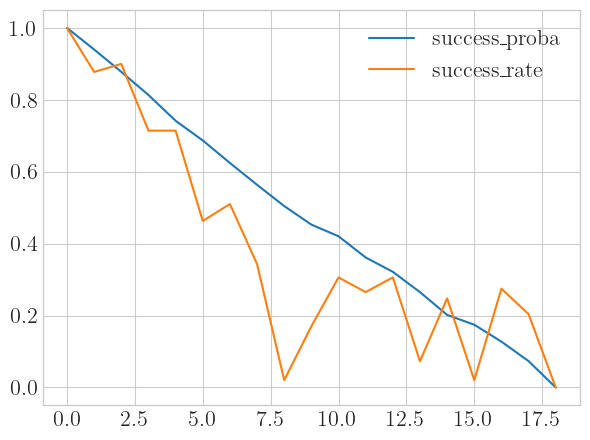

In [15]:
steps_info = environment.steps_info()
predictions = pd.concat(
    [
        steps_info.success_proba.iloc[:-1].reset_index(drop=True),
        steps_info.success_rate.iloc[1:].reset_index(drop=True),
    ],
    axis=1,
).astype(float)
((predictions - predictions.min()) / (predictions.max() - predictions.min())).iloc[
    :50
].plot.line()
predictions.corr()

<Axes: >

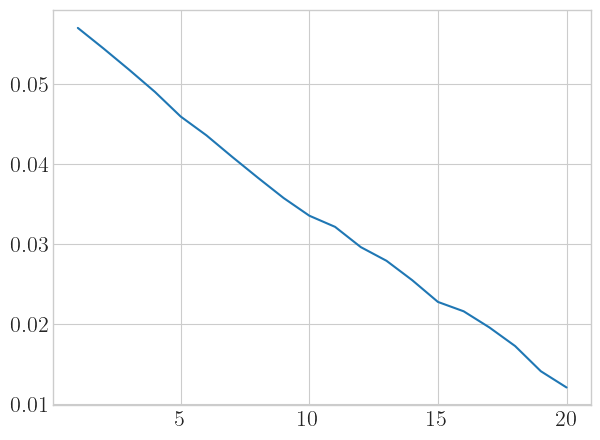

In [16]:
steps_info.success_proba.plot.line()

<Axes: >

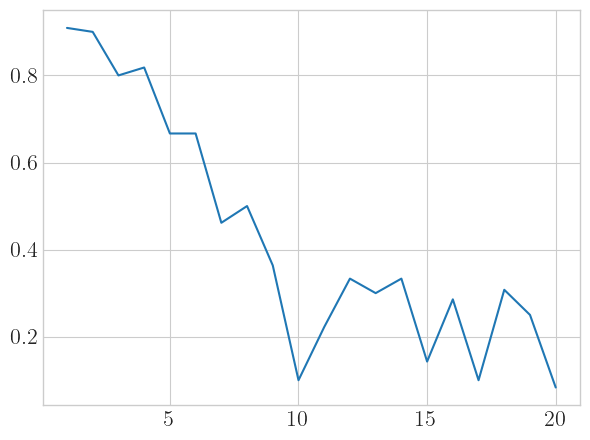

In [17]:
environment.steps_info().success_rate.plot.line()